# STA 141B: Homework 2
Winter 2018

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [26]:
from PIL import Image 
# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

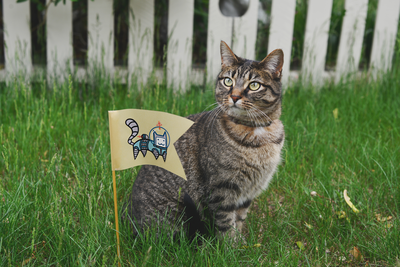

In [27]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [28]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [29]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x)) 

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [30]:
cat.ndim #cat array has three dimensions; 

3

In [31]:
cat.shape

(267L, 400L, 3L)

#### The most inside dimention has three numbers that defines a pixel in 25 bit RGB image. They represents red, green, and blue intensity respecitively. The outer two dimensions represent the x and y in the two dimensional image or the location of pixel in the image. 

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

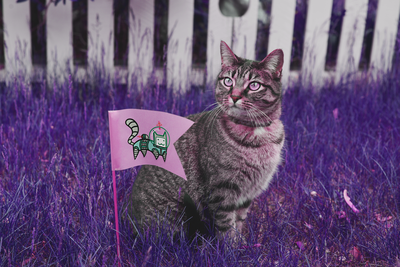

In [32]:
newcat=cat.copy()
newcat[:,:,[1,2]]=newcat[:,:,[2,1]] 
as_image(newcat)

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

#### Copy is necessary because it prevents from overwriting the orignal file. If copy is not used here, any change made to the copied version would apply to the original version. 

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

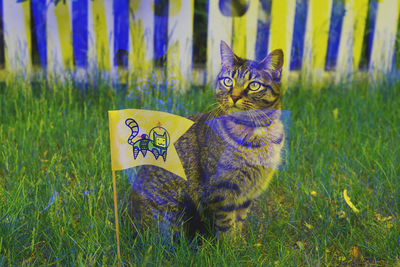

In [33]:
newcat2=cat.copy()
newcat2[:,:,2]=np.fliplr(newcat2[:,:,2])
as_image(newcat2)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [34]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x); 
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt); 
vt.T[:,0:1]

('u is:\n', array([[-0.68145174, -0.73186305],
       [-0.73186305,  0.68145174]]), '\nd is:\n', array([ 4.52966162,  2.54600974]), '\nv^T is:\n', array([[-0.48471372, -0.62402665, -0.6128975 ],
       [ 0.80296442, -0.03960025, -0.59470998],
       [ 0.34684399, -0.78039897,  0.52026598]]))


array([[-0.48471372],
       [-0.62402665],
       [-0.6128975 ]])

###### If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [35]:
def pcmatrix (X,q): 
    """This function takes in a matrix and returns its principal component matrix and basis matrix"""
    u, d, vt = np.linalg.svd(X)
    V=vt.T   
    Vq=V[:,0:q] #keep first qth column
    VqT=Vq.T
    XVq=X.dot(Vq)
    return XVq,VqT
def Xhat(XVq,VqT):
    """This function takes in principal component matrix and basis matrix, returns X hat"""
    Xappro=XVq.dot(VqT)
    return Xappro

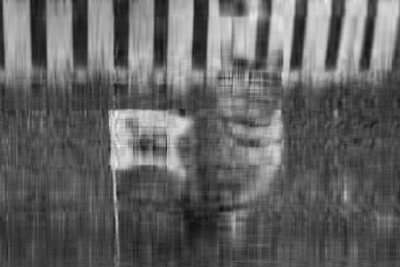

In [36]:
redchannel=cat[:,:,0] #red channel
Xappro1=Xhat(pcmatrix(X=redchannel,q=6)[0],pcmatrix(X=redchannel,q=6)[1]) 
as_image(Xappro1)
Xappro2=Xhat(pcmatrix(X=redchannel,q=12)[0],pcmatrix(X=redchannel,q=12)[1])
as_image(Xappro2) #the smallest number of terms to recognize a cat is around 12. 

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [37]:
redchannel.nbytes #redchannel.nbytes 
redchannel.dtype #dtype('uint8')
np.uint64(redchannel).nbytes #Output is 854400; The red color channel of cat image use 854400 bytes; 

catXVq,catVqT=pcmatrix(X=redchannel,q=10) 
catXVq.dtype #dtype('float64')
catVqT.dtype #dtype('float64')
catXVq.nbytes+catVqT.nbytes #Output: 53360bytes; XVq and VqT contains 

#53360/854400=6.2% of orignal size.

53360

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [38]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [39]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [40]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

('x_coef is:\n', array([[ 11.+0.j,  -1.+0.j],
       [ -1.+0.j,   0.+0.j]]), '\nx approx is:\n', array([[ 1.33333333,  1.83333333,  1.83333333],
       [ 1.66666667,  2.16666667,  2.16666667]]))


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [41]:
def FFTco(X,R):
    """This function takes in a matrix X and position R where zero out starts; it returns a FFT coefficent and dimension of X"""
    X_coef=np.fft.rfft2(X)
    D=X.shape
    X_coef[R:,R:]=0  
    return X_coef,D   
def FFT(x_coef,d):
    """This function takes in FFT coefficient and dimension of a matrix and returns an approximation of X"""
    Xappro=np.fft.irfft2(x_coef,d)
    return Xappro

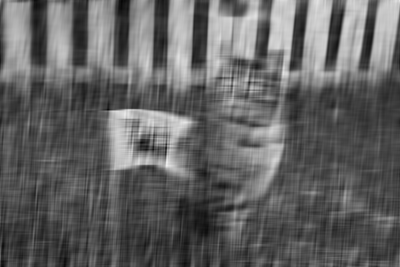

In [42]:
redchannel=cat[:,:,0]
x_coef,d=FFTco(redchannel,R=1)
as_image(FFT(x_coef,d))

x_coef,d=FFTco(redchannel,R=10)
as_image(FFT(x_coef,d))

x_coef,d=FFTco(redchannel,R=13)
as_image(FFT(x_coef,d)) #the minimal R to use around 13; 

In [70]:
a=redchannel.shape[0] 
b=redchannel.shape[1]
r=13
q2=a*b-(a-r)*(b-r) #this is the numbers for terms left after zero out from rth position
q2 #8502 is the smallest number of terms left and 13 is smallest index to start zero out

8502L

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [69]:
def bytescompare(X,q1,R): #q1 is the q (number of terms left) in SVD; R is position to zero out in FFT
    """This function is to compare number of bytes used for the two methods for the same amount of elements stored; This function takes in matrix X and position R to zero out for FFT method and q1 for SVD; It returns number of bytes used by the two methods"""
    #calcuate byte per elements stored for FFT:
    X_coef,D=FFTco(X,R) 
    zeroout=X_coef[R:,R:]
    FFTbyte=np.complex64(X_coef).nbytes-np.complex64(zeroout).nbytes+np.array(X.shape).nbytes  #np.array(X.shape) has dtype: int64 already; 
    q2=a*b-(a-r)*(b-r) #q2 is the number of elements to store in FFT after zeroing out; 
    FFTbyteperelement=round(float(FFTbyte)/float(q2),2) #byte per element for FFT
    #calcuate byte per elements for SVD:
    XVq,VqT=pcmatrix(X,q1)
    n,p=X.shape[0],X.shape[1] #n is number of rows in matrix A and p is number of columns in X.          
    SVDbyte=XVq.nbytes+VqT.nbytes #XVq and VqT have float64 dtype; 
    SVDbyteperelement=round(float(SVDbyte)/float(n*q1+p*q1),2)   #byte per element for SVD
    return FFTbyteperelement,SVDbyteperelement
X=cat[:,:,0]
bytescompare(X,q1=5,R=5) #Output:(4.31, 8.0)
bytescompare(X,q1=13,R=13) #Output:(5.57, 8.0)
#Result showed that to store the same amount of element, FFT costs lower bytes than SVD. 

(5.57, 8.0)

4


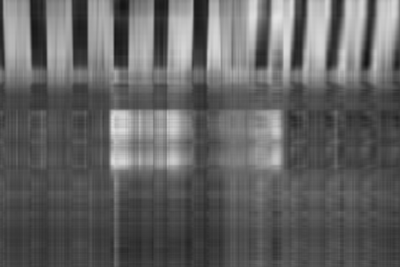

In [73]:
#below is to compare image clarity of the two methods when the same amount of elements are stored. 
r=5
q2=a*b-(a-r)*(b-r) #q2 is the amount of elements stored in FFT.
n,p=X.shape[0],X.shape[1]
q1=q2/(n+p)#calculate q1 for SVD that refers to the same amount of elements stored in SVD as in FFT
print q1
X_appro1=FFT(FFTco(X,r)[0],FFTco(X,r)[1])
as_image(X_appro1)
X_appro2=Xhat(pcmatrix(X,q1)[0],pcmatrix(X,q1)[1])
as_image(X_appro2)
#output: FFT method shows more clear image than SVD for the same amount of elements stored. 

9


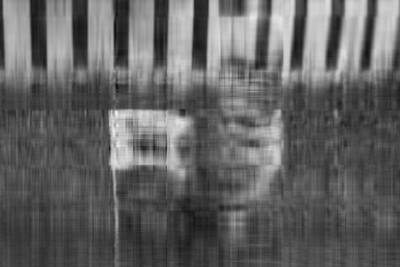

In [46]:
r=10
q2=a*b-(a-r)*(b-r)
#calculate q1 for SVD that refers to the same amount of elements stored in SVD as in FFT
n,p=X.shape[0],X.shape[1]
q1=q2/(n+p)
print q1
X_appro1=FFT(FFTco(X,r)[0],FFTco(X,r)[1])
as_image(X_appro1)
X_appro2=Xhat(pcmatrix(X,q1)[0],pcmatrix(X,q1)[1])
as_image(X_appro2)
#output: Result is the same: FFT image is more clear than SVD given the same amount of elemtents stored. 

#### For file compression, FFT compresses the file as long as the number of elements to zero out>0 while SVD compresses the file only when nq+pq<np; From above result, we can see the same amounts of elements to store, FFT stores significantly lower amount of bytes than SVD; It is very good for file compression; SVD compressed file only when nq+pq<np. Image clarity is better in FFT than SVD given the same amount of elements to store. For dimension reduction, FFT need q' amount of elements to reconstruct image, while SVD need nq+pq amount of elements to reconstruct image. Thus, SVD is better for dimension reduction. 